In [3]:
# MODEL NAME - LONG SHORT TERM MEMORY(LSTM)(RNN-DEEP LEARNING)

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data  

In [5]:
import yfinance as yf
start = '2010-01-01'
end = '2023-12-31'

stock_symbol = 'AAPL'
df = yf.download(stock_symbol, start=start, end=end)
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-09,176.809998,179.050003,175.800003,178.990005,178.990005,42390800
2023-10-10,178.100006,179.720001,177.949997,178.389999,178.389999,43698000
2023-10-11,178.199997,179.850006,177.600006,179.800003,179.800003,47551100
2023-10-12,180.070007,182.339996,179.039993,180.710007,180.710007,56679900
2023-10-13,181.419998,181.929993,178.470001,179.164993,179.164993,21562949


In [8]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800


In [9]:
df = df.drop(['Date', 'Adj Close'], axis =1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


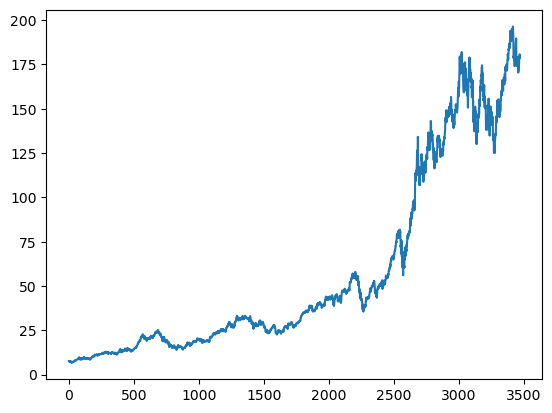

In [10]:
plt.plot(df.Close)

In [11]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3464,176.809998,179.050003,175.800003,178.990005,42390800
3465,178.100006,179.720001,177.949997,178.389999,43698000
3466,178.199997,179.850006,177.600006,179.800003,47551100
3467,180.070007,182.339996,179.039993,180.710007,56679900


In [12]:
#100 days moving average 
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3464    182.17830
3465    182.23530
3466    182.28280
3467    182.33830
3468    182.38795
Name: Close, Length: 3469, dtype: float64

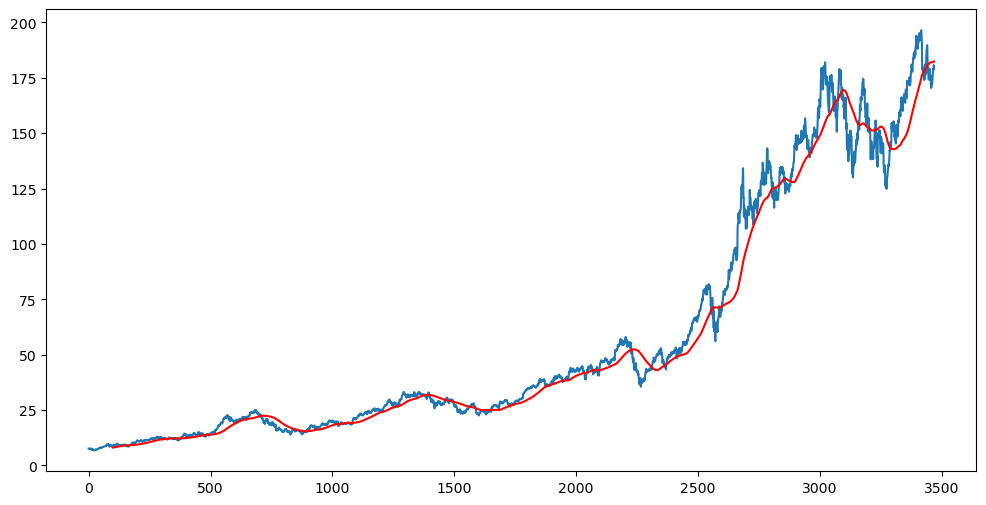

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [14]:
#200 days moving average 
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3464    167.356250
3465    167.570950
3466    167.808800
3467    168.053050
3468    168.298725
Name: Close, Length: 3469, dtype: float64

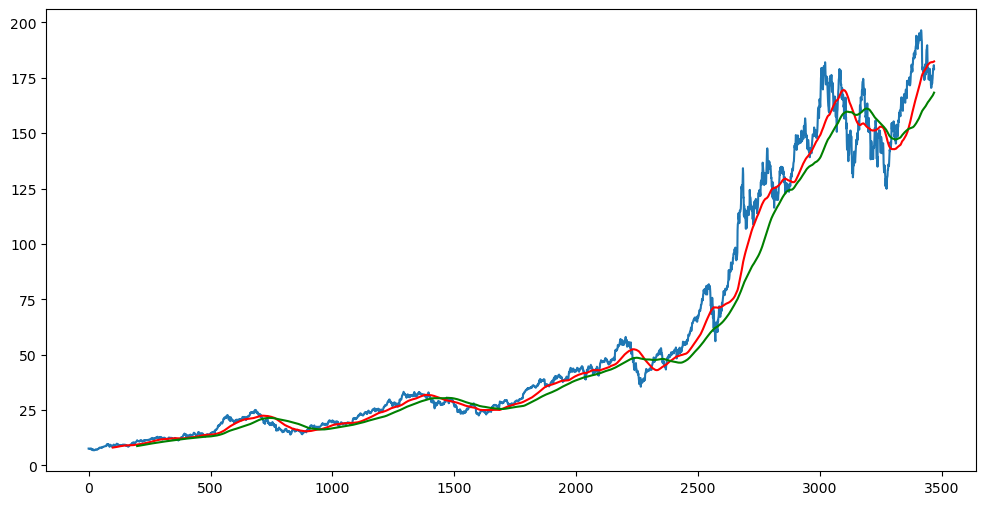

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g') # 200 days ma in green

In [16]:
df.shape

(3469, 5)

In [17]:
# splitting data into training and testing
# 70/30 %

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2428, 1)
(1041, 1)


In [18]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [19]:
data_testing.head()

,Close
2428,51.040001
2429,51.382500
2430,52.252499
2431,52.185001
2432,51.424999


In [20]:
# scaling data into 0 and 1 using sklearn
# minmax scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.90417051],
       [0.85618242],
       [0.8749965 ]])

In [22]:
data_training_array.shape

(2428, 1)

In [23]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
    
x_train, y_train = np.array(x_train), np.array(y_train) 
    

In [24]:
x_train.shape

(2328, 100, 1)

In [25]:
# Machine Learning model

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential



In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) # this are all the layers for building model and 
# we will be joining it using dense layer


model.add(Dense(units = 1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
73/73 [==============================] - 24s 261ms/step - loss: 0.0335
Epoch 2/50
73/73 [==============================] - 20s 277ms/step - loss: 0.0090
Epoch 3/50
73/73 [==============================] - 21s 290ms/step - loss: 0.0078
Epoch 4/50
73/73 [==============================] - 21s 294ms/step - loss: 0.0063
Epoch 5/50
73/73 [==============================] - 20s 275ms/step - loss: 0.0069
Epoch 6/50
73/73 [==============================] - 20s 275ms/step - loss: 0.0058
Epoch 7/50
73/73 [==============================] - 20s 275ms/step - loss: 0.0052
Epoch 8/50
73/73 [==============================] - 20s 276ms/step - loss: 0.0056
Epoch 9/50
73/73 [==============================] - 21s 281ms/step - loss: 0.0053
Epoch 10/50
73/73 [==============================] - 20s 278ms/step - loss: 0.0046
Epoch 11/50
73/73 [==============================] - 21s 282ms/step - loss: 0.0050
Epoch 12/50
73/73 [==============================] - 20s 278ms/step - loss: 0.0046
Epoch 13/50
7

In [30]:
model.save('keras_model.h5')

c:\Users\Saiban N Pagarkar\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
data_testing.head()

,Close
2428,51.040001
2429,51.382500
2430,52.252499
2431,52.185001
2432,51.424999


In [32]:
data_training.tail(100)

,Close
2328,48.922501
2329,49.250000
2330,50.025002
2331,49.875000
2332,50.154999
...,...
2423,52.590000
2424,53.160000
2425,53.115002
2426,50.660000


In [33]:
past_100_days = data_training.tail(100)

In [51]:
final_df = past_100_days.append(data_testing, ignore_index=True, sort=False)


C:\Users\Saiban N Pagarkar\AppData\Local\Temp\ipykernel_13496\2766528492.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True, sort=False)


In [35]:
final_df.head()

,Close
0,48.922501
1,49.250000
2,50.025002
3,49.875000
4,50.154999


In [36]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0365551 ],
       [0.03869387],
       [0.04375511],
       ...,
       [0.89126534],
       [0.89720822],
       [0.88711834]])

In [37]:
input_data.shape

(1141, 1)

In [38]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1041, 100, 1)
(1041,)


In [40]:
# Making  prediction

y_predicted = model.predict(x_test)
y_predicted.shape


33/33 [==============================] - 6s 141ms/step


(1041, 1)

In [41]:
y_test

array([0.05038368, 0.0526204 , 0.05830203, ..., 0.89126534, 0.89720822,
       0.88711834])

In [42]:
y_predicted

array([[0.05327725],
       [0.05343819],
       [0.05362886],
       ...,
       [0.8271866 ],
       [0.83333796],
       [0.8400948 ]], dtype=float32)

In [43]:
scaler.scale_

array([0.00653061])

In [44]:
scale_factor = 1/0.00653061
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

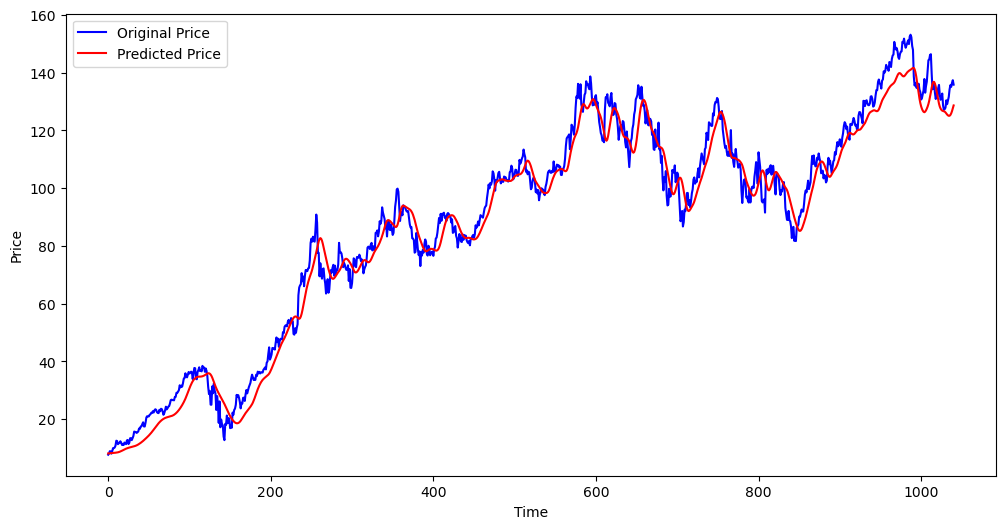

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()